In [65]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [66]:
file1 = '/home/marcocarmonaga/Documents/Elk_projects/MoB_2_project/c_a_vs_Energy/bandas/150/BAND.OUT'
file2 = '/home/marcocarmonaga/Documents/Elk_projects/MoB_2_project/c_a_vs_Energy/bandas/150/BANDLINES.OUT'

In [67]:
bandas_file = np.loadtxt(file1)
high_energy_points_file = np.loadtxt(file2)

In [68]:
bandas = pd.DataFrame(bandas_file, columns=['x','y'])
high_energy_points = pd.DataFrame(high_energy_points_file, columns=['x','y'])

# Plotting the first band

In [69]:
bandas_x = bandas.x[:400]
bandas['y'] = bandas['y'].apply(lambda x: x * 27.2)

In [70]:
lista = [(i,i) for i in high_energy_points.x]
lista = list(set(lista))
lista = sorted(lista)

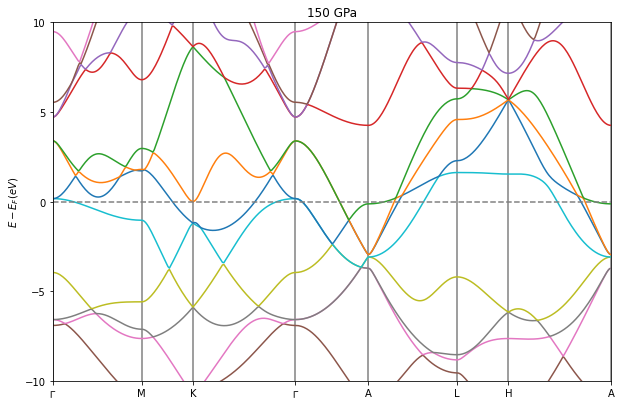

In [71]:
fig, ax = plt.subplots()
fig.set_size_inches(10,6.6)
plt.ylim(-10, 10)
plt.xlim(0,bandas.x.max())
for i in range(len(lista)):
    ax.plot(lista[i],[high_energy_points.y[0]*27.2,high_energy_points.y[1]*27.2 ], c='gray')
for i in range(int(len(bandas.y.values.reshape(-1,1)) / 400)):
    inicio = i * 400
    fin = (i+1) * 400
    ax.plot(bandas_x,bandas.y[inicio : fin])
ax.plot([0,bandas.x.max()],[0,0],'--', c='gray')
ax.plot(bandas_x, bandas.y[:400])
ax.set_xticks(ticks=[lista[i][0] for i in range(len(lista))])
ax.set_xticklabels([r"$\mathbb{\Gamma}$",r"M",r"K",r"$\mathbb{\Gamma}$",r"A",r"L",r"H",r"A"])
ax.set_yticks([-10,-5,0,5,10])
ax.set_ylabel(r"$E-E_{F}(eV)$")
ax.set_title('150 GPa')
plt.savefig('BANDS.png')
plt.show()